<a href="https://colab.research.google.com/github/rafaelnduarte/Image_Classification_With_CNN_Tensorflow/blob/master/Image_Classification_with_CNN_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification with Convolutional Neural Networks - Tensorflow

***Fashion MNIST*** is a dataset used in **Deep Learning** and **Computer Vision**, with over 70 thousand images divided into 10 different classes.

Despite bringing pre-processed images, it represents a good challenge for applying Deep Neural Networks. Specifically, it's great to demonstrate a special type of Neural Networks, known as **Convolutional Neural Networks**.

The *dataset* is divided into train (60 thousand images) and test (10 thousand images). Each of these images is 28 x 28 pixels.

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/fashion-mnist-sprite.png" height="400px"></p>

Each one of the images belongs exclusively to one of the classes. The table below shows the classes as described by the source of the data.

<table>
  <tbody><tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</tbody></table>

This dataset was created to replace the original MNIST dataset, where the images where handwritten digits. Among the main reasons for the change, we can mention:

* The original dataset was too easy since Convolutional Neural Networks could get to an accuracy score of 99.7% with ease.
* It didn't represent the most modern challenges in Computer Vision anymore.

<p align="center"><img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/embedding.gif" height="300px"></p>

## Obtaining the Data
There are two ways we can obtain the Fashion MNIST dataset:

* [Directly from their repository on GitHub](https://github.com/zalandoresearch/fashion-mnist)
* Loading them from **TensorFlow**

For this project, let's get it from Tensorflow itself.

In [1]:
# importing the necessary packages
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

# setting visual environment
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', style= 'whitegrid', color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# loading Fashion MNIST data
(X_train_orig, y_train_orig), (X_test_orig, y_test_orig) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Having the name of the categories is going to help us on our data exploration.

For that reason, let's name them.

In [0]:
# naming the classes
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

## Data Exploration

Even though this dataset comes previously processed and well documented, let's explore it a little bit to get some insights from it. First, let's check its dimensions.

As seen before, we have over 60 thousand training images and 10 thousand test images. They're all 28 x 28 in gray (1 channel).

On top of that, we can see what an image "looks like" when converted into an array. Also, it's worth mentioning that the values of each pixel are between $[0,255]$.

In [4]:
# checking the shape of the dataframes
print("Shape of the DataFrames:")
print("X_train_orig:", X_train_orig.shape)
print("y_train_orig:", y_train_orig.shape)
print("X_test_orig:", X_test_orig.shape)
print("y_test_orig:", y_test_orig.shape)

# checking one of the images
print("\n\nImage converted to an array:\n", X_train_orig[0][:5][:5])

Shape of the DataFrames:
X_train_orig: (60000, 28, 28)
y_train_orig: (60000,)
X_test_orig: (10000, 28, 28)
y_test_orig: (10000,)


Image converted to an array:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]]


It's also import to check whether the dataset is balanced or not. It could end up creating an unwanted bias in our model, so let's make sure our data is balanced.

In [5]:
print("Train Dataset:")
np.unique(y_train_orig, return_counts=True)

Train Dataset:


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [6]:
print("Test Dataset:")
np.unique(y_test_orig, return_counts=True)

Test Dataset:


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

As we can see, our images are perfectly balanced, so the quantity of images in a given class won't create a bias in our model.

There isn't much to explore on this dataset given that it's been well prepared and is very well documented at the source. The importance of this step for us is to be aware of the data we have in hand.

Finally, let's take a look at our images and see what they look like.

We can see the class names we created before coming in handy now.

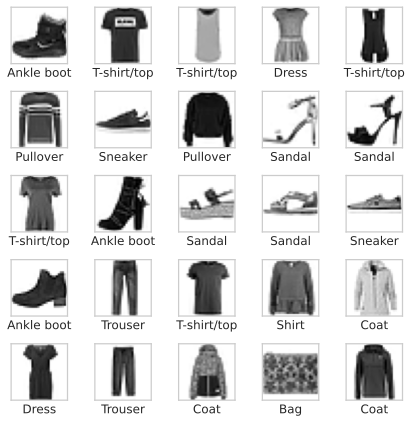

In [7]:
# checking some of the images
plt.figure(figsize=(6,6))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_orig[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_orig[i]])
plt.tight_layout()

## Data Preprocessing

Before creating the model and train our Neural Network, let's go through some preprocessing.

### Normalizing the pixels

The intesity of the pixels must be normalized, that is, the integer values must be converted to `float`, and be in the range $[0,1]$.

With a maximum pixel value of 255, all we have to do is divide all the individual pixels by 255.0, and they'll be normalized and converted into `float`.

In [0]:
# creating lambda function to transform and normalize pixels
f = lambda x: (x / 255.0).astype('float32')

# apllying the function to the datasets
X_train = f(X_train_orig)
X_test = f(X_test_orig)

### Reshaping the images

O primeiro *layer* convolucional espera um único tensor que contenha todos os *pixels*. O TensorFlow espera uma única lista com 4 dimensões, e não 60000 itens de dimensões 28 x 28 x 1, como é o caso do *dataset* de treino (o mesmo vale para os dados de teste).

In [9]:
# reshaping the images
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

print('X_train:{}'.format(X_train.shape))
print('X_test:{}'.format(X_test.shape))

X_train:(60000, 28, 28, 1)
X_test:(10000, 28, 28, 1)


### One-Hot Encoding

Our labels are already encoded in categories from 0 do 9, in what we call Integer Encoding. It's possible to use `y_train` and `y_test`, as long as you use `loss="sparse_categorical_crossentropy"`.

However, by doing so, you can make your model understand that there is a natural order among the labels, which is not true. That can cause the model to lose performance.

For categorical variables where there is no ordinal relationship, it's better to use One-Hot-Encoding. To know more about the differences between these two techniques, [read this article](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/).

Take a look at a practical example of this kind of encoding.


In [10]:
# creating an Integer Encoded example
example = np.array([1,3,4,2,0])
print('Example before Encoding:')
print(example)

# creating a One-Hot-Encoded example
example_encoded = keras.utils.to_categorical(example)
print('\nExample after Encoding')
print(example_encoded)

Example before Encoding:
[1 3 4 2 0]

Example after Encoding
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


Just like we did it on the example above, let's do it to our datasets.

In [0]:
# One-Hot-Encoding our datasets
y_train = keras.utils.to_categorical(y_train_orig)
y_test = keras.utils.to_categorical(y_test_orig)


## Defining a Convolutional Neural Network

There are many well-known Convolutional Neural Networks architectures. For this project, we'll use a simplified VGGNet architecture, which was implemented in an article by the Data Scientist Adrian Rosebroke.

The original implementation was adapted here, to make it fit the dimension of our images and to allow the Keras API to be used.

In [0]:
# based on the MiniVGGNet by Adrian Rosebroke
# first CONV => RELU => RELU => POOL layer set
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

# second CONV => RELU => CONV => RELU => POOL layer set
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

# fisrt (and only) set of FC => RELU layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

# softmax classifier
model.add(keras.layers.Dense(10, activation='softmax'))

Since the labels are *one-hot encoded*, we'll use `loss="categorical_crossentropy"` to compile the model.

Also, we'll use 1/3 of the data as validation set.

In [13]:
# compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# training the model and saving the info in history
history = model.fit(X_train, y_train, epochs=20, validation_split=0.3)

Epoch 1/20
1313/1313 [==============================] - 18s 14ms/step - loss: 0.5211 - accuracy: 0.8214 - val_loss: 0.3122 - val_accuracy: 0.8859
Epoch 2/20
1313/1313 [==============================] - 17s 13ms/step - loss: 0.3311 - accuracy: 0.8824 - val_loss: 0.2776 - val_accuracy: 0.9017
Epoch 3/20
1313/1313 [==============================] - 17s 13ms/step - loss: 0.2923 - accuracy: 0.8951 - val_loss: 0.2300 - val_accuracy: 0.9188
Epoch 4/20
1313/1313 [==============================] - 17s 13ms/step - loss: 0.2650 - accuracy: 0.9032 - val_loss: 0.2422 - val_accuracy: 0.9136
Epoch 5/20
1313/1313 [==============================] - 17s 13ms/step - loss: 0.2461 - accuracy: 0.9119 - val_loss: 0.2245 - val_accuracy: 0.9207
Epoch 6/20
1313/1313 [==============================] - 17s 13ms/step - loss: 0.2356 - accuracy: 0.9159 - val_loss: 0.2327 - val_accuracy: 0.9191
Epoch 7/20
1313/1313 [==============================] - 17s 13ms/step - loss: 0.2206 - accuracy: 0.9200 - val_loss: 0.2098 -

## Evaluating the Model

In general, our model reached an accuracy of 95% on the training dataset and 93% on the validation dataset.

However, if we take a closer look we'll see that it didn't perform so well on the category `Shirt`. This can probably be improved by Data Augmentation, for example.

In [14]:
# checking predictions on each category
y_hat = model.predict(X_test)
y_hat_classes = np.argmax(y_hat, axis=1)
print(classification_report(y_test_orig, y_hat_classes, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.87      0.88      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.94      0.87      0.90      1000
       Dress       0.93      0.95      0.94      1000
        Coat       0.87      0.93      0.90      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.78      0.80      0.79      1000
     Sneaker       0.97      0.98      0.98      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.98      0.97      0.98      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



Taking a look at the *accuracy* and *val_accuracy* curves, we can identify some overfitting, but it didn't worsen our results in the validation set.

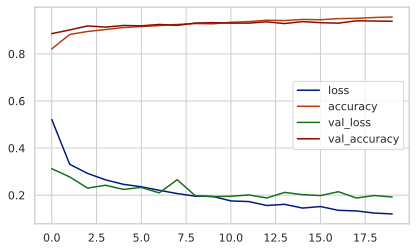

In [15]:
# plotting optimization history
pd.DataFrame(history.history).plot()
plt.show()

Finally, we can see that the accuracy of the test dataset is really good, which means that the model is generic enough to deal well with new data.

In [17]:
# checking the performance of the model
score = model.evaluate(X_test, y_test)
print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.2106 - accuracy: 0.9322
Loss: 0.2106
Accuracy: 0.9322


## Future Improvements
As we could see, there is still room for improvement in this project. Even though we reached excellent train, validation and test scores, we identified some flaws, such as the lower accuracy for Shirts and T-shirts, which suggests that the model might be mixing them up.

One of the things that we can do is use Data Augmentation, to see if the results improve.

This will be implemented in a future update of this project.

# Thank You!

Thank you for your time and attention, and I hope you found this project interesting and insightful. Should you have any questions don't hesitate to contact me on [LinkedIn](https://www.linkedin.com/in/rafael-n-duarte/) and check out my other projects on my [GitHub](https://github.com/rafaelnduarte)

[![LinkedIn](https://img.shields.io/badge/LinkedIn-rafaelnduarte-blue.svg)](https://www.linkedin.com/in/rafael-n-duarte)
[![GitHub](https://img.shields.io/badge/GitHub-rafaelnduarte-purple.svg)](https://github.com/rafaelnduarte)

<center><img width="90%" src="https://github.com/rafaelnduarte/Portfolio/blob/master/rafaelnd_banner.png?raw=true"></center>